In [168]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from scipy import stats
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv


In [169]:
df = pd.read_csv("/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv")
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [171]:
# remove leading and trailing whitespaces
df.columns = df.columns.str.strip()
df['education'] = df['education'].apply(lambda x: x.strip())
df['self_employed'] = df['self_employed'].apply(lambda x: x.strip())
df['loan_status'] = df['loan_status'].apply(lambda x: x.strip())

In [172]:
#check for missing values
df.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [173]:
# find number of unique values in each column
df.nunique()

loan_id                     4269
no_of_dependents               6
education                      2
self_employed                  2
income_annum                  98
loan_amount                  378
loan_term                     10
cibil_score                  601
residential_assets_value     278
commercial_assets_value      188
luxury_assets_value          379
bank_asset_value             146
loan_status                    2
dtype: int64

In [174]:
# check whether class label imbalanced
df["loan_status"].value_counts()/len(df)*100

loan_status
Approved    62.215976
Rejected    37.784024
Name: count, dtype: float64

In [175]:
#remove loan_id as does not contribute
df.drop(columns=["loan_id"], inplace=True)

In [176]:
# perform label encoding
df['education'] = df['education'].replace({'Not Graduate':0, 'Graduate':1})
df['self_employed'] = df['self_employed'].replace({'No':0, 'Yes':1})
df['loan_status'] = df['loan_status'].replace({'Rejected':0, 'Approved':1})

In [177]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


In [178]:
# check each feature's correlation with class label
df.corr()['loan_status']

no_of_dependents           -0.018114
education                   0.004918
self_employed               0.000345
income_annum               -0.015189
loan_amount                 0.016150
loan_term                  -0.113036
cibil_score                 0.770518
residential_assets_value   -0.014367
commercial_assets_value     0.008246
luxury_assets_value        -0.015465
bank_asset_value           -0.006778
loan_status                 1.000000
Name: loan_status, dtype: float64

In [179]:
# create two different copies to check for variations of feature combinations
check_df = df.copy()
check_2_df = df.copy()

In [180]:
# combine all assets into one
check_2_df['assets'] = check_2_df['bank_asset_value'] + check_2_df['luxury_assets_value'] + check_2_df['residential_assets_value'] + check_2_df['commercial_assets_value']

In [181]:
# categorise assets into movable and immovable
check_df['movable_assets'] = check_df['bank_asset_value'] + check_df['luxury_assets_value']

check_df['immovable_assets'] = check_df['residential_assets_value'] + check_df['commercial_assets_value']

In [182]:
check_df.drop(columns=['bank_asset_value','luxury_assets_value', 'residential_assets_value', 'commercial_assets_value' ], inplace=True)
check_2_df.drop(columns=['bank_asset_value','luxury_assets_value', 'residential_assets_value', 'commercial_assets_value' ], inplace=True)

In [183]:
check_df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,movable_assets,immovable_assets
0,2,1,0,9600000,29900000,12,778,1,30700000,20000000
1,0,0,1,4100000,12200000,8,417,0,12100000,4900000
2,3,1,0,9100000,29700000,20,506,0,46100000,11600000
3,3,1,0,8200000,30700000,8,467,0,31200000,21500000
4,5,0,1,9800000,24200000,20,382,0,34400000,20600000
...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,0,4100000,3300000
4265,0,0,1,3300000,11300000,20,559,1,12900000,7100000
4266,2,0,0,6500000,23900000,18,457,0,25400000,13600000
4267,1,0,0,4100000,12800000,8,780,1,19900000,8900000


In [184]:
check_2_df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,assets
0,2,1,0,9600000,29900000,12,778,1,50700000
1,0,0,1,4100000,12200000,8,417,0,17000000
2,3,1,0,9100000,29700000,20,506,0,57700000
3,3,1,0,8200000,30700000,8,467,0,52700000
4,5,0,1,9800000,24200000,20,382,0,55000000
...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,0,7400000
4265,0,0,1,3300000,11300000,20,559,1,20000000
4266,2,0,0,6500000,23900000,18,457,0,39000000
4267,1,0,0,4100000,12800000,8,780,1,28800000


In [185]:
check_2_df.corr()['loan_status']

no_of_dependents   -0.018114
education           0.004918
self_employed       0.000345
income_annum       -0.015189
loan_amount         0.016150
loan_term          -0.113036
cibil_score         0.770518
loan_status         1.000000
assets             -0.011281
Name: loan_status, dtype: float64

In [186]:
check_df.corr()['loan_status']

no_of_dependents   -0.018114
education           0.004918
self_employed       0.000345
income_annum       -0.015189
loan_amount         0.016150
loan_term          -0.113036
cibil_score         0.770518
loan_status         1.000000
movable_assets     -0.013755
immovable_assets   -0.006200
Name: loan_status, dtype: float64

In [187]:
df.corr()['loan_status']

no_of_dependents           -0.018114
education                   0.004918
self_employed               0.000345
income_annum               -0.015189
loan_amount                 0.016150
loan_term                  -0.113036
cibil_score                 0.770518
residential_assets_value   -0.014367
commercial_assets_value     0.008246
luxury_assets_value        -0.015465
bank_asset_value           -0.006778
loan_status                 1.000000
Name: loan_status, dtype: float64

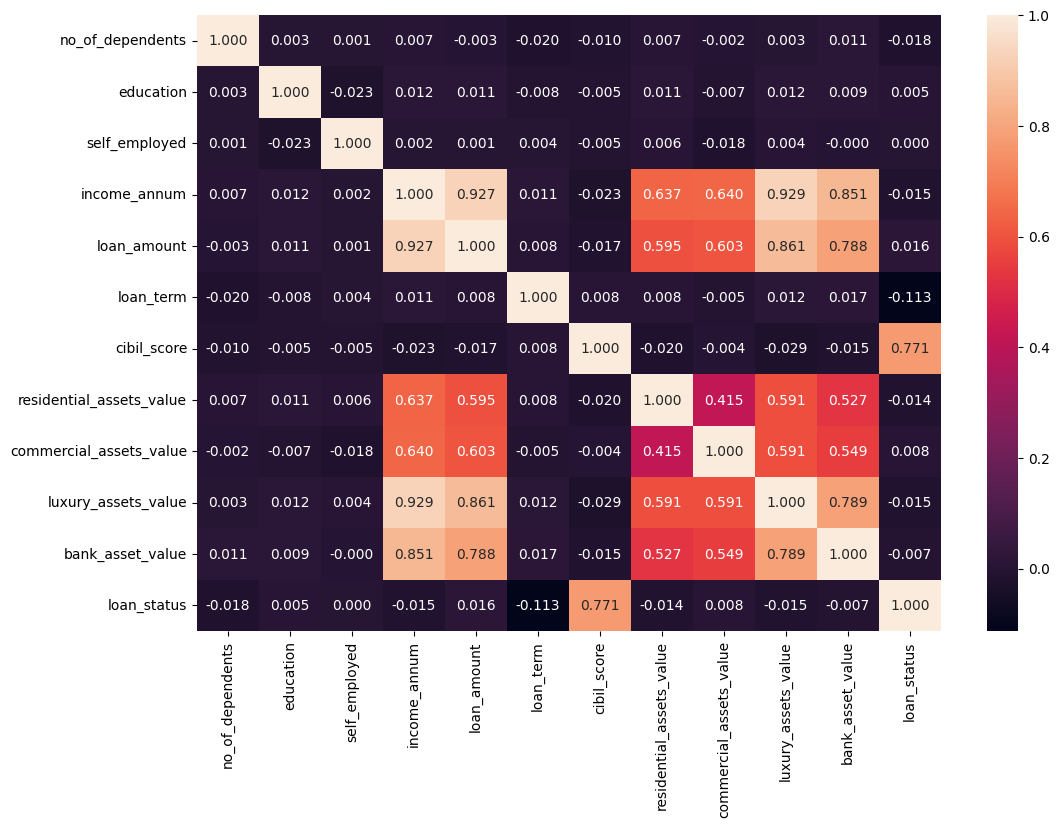

In [188]:
# check each attribute's correlation with other attributes
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt='.3f')
plt.show()

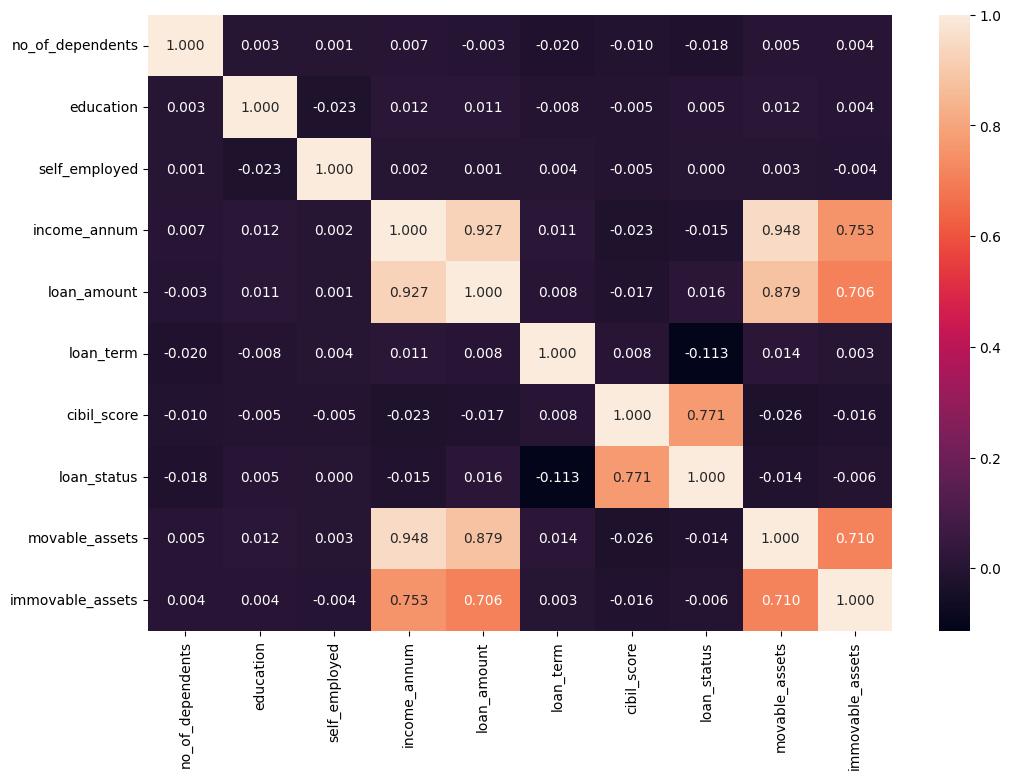

In [189]:
plt.figure(figsize=(12,8))
sns.heatmap(check_df.corr(), annot=True, fmt='.3f')
plt.show()

In [190]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn import tree

In [191]:
Y = check_df['loan_status']
X = check_df.drop('loan_status',axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [192]:
# z-score normalization
normalize = StandardScaler()
X_train = normalize.fit_transform(X_train)
X_test = normalize.transform(X_test)

In [193]:
#Store each model's best accuracy
scores_model = {}

### Decision Tree

In [194]:
params = {'criterion':['gini', 'entropy'], 'splitter':['best', 'random'], 'min_samples_leaf': [i for i in range(1, 10)], 'min_samples_split': [i for i in range(2, 10)]}
grid = GridSearchCV(DecisionTreeClassifier(), params)
grid.fit(X_train, y_train)
print("The best parameters for Decision Tree Classification:")
grid.best_params_

The best parameters for Decision Tree Classification:


{'criterion': 'entropy',
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'splitter': 'best'}

In [195]:
clsf = DecisionTreeClassifier(criterion = grid.best_params_['criterion'], splitter = grid.best_params_['splitter'], min_samples_leaf = grid.best_params_['min_samples_leaf'], min_samples_split = grid.best_params_['min_samples_split'])
clsf = clsf.fit(X_train, y_train)

In [196]:
y_pred = clsf.predict(X_test)
print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred))
print("Cross Validation Score:", cross_val_score(clsf, X_train, y_train).mean())
scores_model["Decision Tree Classifier"] = metrics.accuracy_score(y_test, y_pred)

Accuracy Score: 0.977751756440281
Cross Validation Score: 0.982723279648609


In [197]:
feature_weightage = dict(zip(clsf.feature_importances_, check_df.columns))
print("Weightage of each feature:")
for key in reversed(sorted(feature_weightage)):
    print(feature_weightage[key], key)

Weightage of each feature:
cibil_score 0.7677670152705381
loan_term 0.127285358905864
loan_amount 0.04148001397207707
income_annum 0.03342518535116595
movable_assets 0.02191490852712698
loan_status 0.0047967951098844795
no_of_dependents 0.0024699102587066664
self_employed 0.0008608126046366818
education 0.0


### SVC

In [198]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
print("Accuracy for each kernel:\n")
for kern in kernels:
    model = SVC(kernel = kern, C = 1)
    model.fit(X_train, y_train)
    print(f"Kernel: {kern}")
    print("Cross Validation Score:", cross_val_score(model, X_train, y_train).mean())
    print(f"Accuracy: {model.score(X_test, y_test)}\n")

Accuracy for each kernel:

Kernel: linear
Cross Validation Score: 0.9259150805270864
Accuracy: 0.9168618266978923

Kernel: rbf
Cross Validation Score: 0.9431918008784773
Accuracy: 0.9332552693208431

Kernel: poly
Cross Validation Score: 0.9297218155197658
Accuracy: 0.9262295081967213

Kernel: sigmoid
Cross Validation Score: 0.8298682284040997
Accuracy: 0.8220140515222483



In [199]:
print("Polynomial Kernel")
for i in range(1, 6):
    model = SVC(kernel = 'poly', degree = i, C = 100)
    model.fit(X_train, y_train)
    print(f'Degree: {i}')
    print(f'Accuracy (Test Data): {model.score(X_test, y_test)}')
    print(f'Accuracy (Train Data): {model.score(X_train, y_train)}\n')

Polynomial Kernel
Degree: 1
Accuracy (Test Data): 0.914519906323185
Accuracy (Train Data): 0.926207906295754

Degree: 2
Accuracy (Test Data): 0.6651053864168618
Accuracy (Train Data): 0.6535871156661787

Degree: 3
Accuracy (Test Data): 0.955503512880562
Accuracy (Train Data): 0.972181551976574

Degree: 4
Accuracy (Test Data): 0.8044496487119438
Accuracy (Train Data): 0.865592972181552

Degree: 5
Accuracy (Test Data): 0.9320843091334895
Accuracy (Train Data): 0.9838945827232797



In [200]:
param_grid = {'C':[0.1, 1, 100], 'kernel':['rbf', 'poly', 'sigmoid', 'linear'], 'degree':[1, 2, 3, 4, 5, 6]}
grid = GridSearchCV(SVC(), param_grid)
grid.fit(X_train, y_train)
print("Result of grid search:")
print(grid.best_params_)
print(f"Accuracy of selected kernel: {grid.score(X_test, y_test)}")
print(f"\nThe kernel that works best for the SVM classification of this dataset is: {grid.best_params_['kernel']}")

Result of grid search:
{'C': 100, 'degree': 1, 'kernel': 'rbf'}
Accuracy of selected kernel: 0.9414519906323185

The kernel that works best for the SVM classification of this dataset is: rbf


In [201]:
model = SVC(kernel = grid.best_params_['kernel'], degree = grid.best_params_['degree'], C = grid.best_params_['C'])
model.fit(X_train, y_train)
print(f'Accuracy (Test Data): {model.score(X_test, y_test)}')
print(f'Accuracy (Train Data): {model.score(X_train, y_train)}')
print("Cross Validation Score:", cross_val_score(model, X_train, y_train).mean())
scores_model["Support Vector Classification"] = model.score(X_test, y_test)

Accuracy (Test Data): 0.9414519906323185
Accuracy (Train Data): 0.991800878477306
Cross Validation Score: 0.9528550512445095


### Random Forest Classifier

In [202]:
params = {'criterion':['gini', 'entropy', 'log_loss'], 'min_samples_leaf': [i for i in range(1, 10, 2)], 'min_samples_split': [i for i in range(2, 11, 2)]}
grid = GridSearchCV(RandomForestClassifier(), params)
grid.fit(X_train, y_train)
print("The best parameters for Random Forest Classification:")
grid.best_params_

The best parameters for Random Forest Classification:


{'criterion': 'log_loss', 'min_samples_leaf': 1, 'min_samples_split': 4}

In [203]:
clsf = RandomForestClassifier(criterion = grid.best_params_['criterion'], min_samples_leaf = grid.best_params_['min_samples_leaf'], min_samples_split = grid.best_params_['min_samples_split'])
clsf = clsf.fit(X_train, y_train)

In [204]:
y_pred = clsf.predict(X_test)
print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred))
print("Cross Validation Score:", cross_val_score(clsf, X_train, y_train).mean())
scores_model["Random Forest Classifier"] = metrics.accuracy_score(y_test, y_pred)

Accuracy Score: 0.977751756440281
Cross Validation Score: 0.9815519765739384


In [205]:
feature_weightage = dict(zip(clsf.feature_importances_, check_df.columns))
print("Weightage of each feature:")
for key in reversed(sorted(feature_weightage)):
    print(feature_weightage[key], key)

Weightage of each feature:
cibil_score 0.8079619644863533
loan_term 0.07832276784274064
loan_amount 0.03633086808490396
movable_assets 0.02352811272809049
income_annum 0.022414983598597144
loan_status 0.02048505645551129
no_of_dependents 0.007090485317475123
self_employed 0.0019957148719562242
education 0.0018700466143718203


### Gradient Boosting Classifier

In [206]:
params = {'loss':['exponential', 'log_loss'], 'criterion':['friedman_mse', 'squared_error'], 'learning_rate':[0.01, 0.05, 0.1]}
grid = GridSearchCV(GradientBoostingClassifier(), params)
grid.fit(X_train, y_train)
print("The best parameters for Random Forest Classification:")
grid.best_params_

The best parameters for Random Forest Classification:


{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'log_loss'}

In [207]:
clsf = GradientBoostingClassifier(criterion = grid.best_params_['criterion'], loss = grid.best_params_['loss'], learning_rate = grid.best_params_['learning_rate'])
clsf = clsf.fit(X_train, y_train)

In [208]:
y_pred = clsf.predict(X_test)
print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred))
print("Cross Validation Score:", cross_val_score(clsf, X_train, y_train).mean())
scores_model["Gradient Boost Classifier"] = metrics.accuracy_score(y_test, y_pred)

Accuracy Score: 0.9789227166276346
Cross Validation Score: 0.9818448023426061


In [209]:
feature_weightage = dict(zip(clsf.feature_importances_, check_df.columns))
print("Weightage of each feature:")
for key in reversed(sorted(feature_weightage)):
    print(feature_weightage[key], key)

Weightage of each feature:
cibil_score 0.8696852901562597
loan_term 0.08992949872154836
loan_amount 0.02159637482507947
income_annum 0.010250494675015327
loan_status 0.004255018384103376
movable_assets 0.003258127341294029
no_of_dependents 0.0010168459130381498
self_employed 8.349983661540052e-06
education 0.0


### KNN

In [210]:
y_train = y_train.reset_index().drop(columns="index")

y_train = y_train.to_numpy()

y_train = y_train[:, 0]

In [211]:
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

def KNNtrain(X_test, k):
    y_pred = [predict(x, k) for x in X_test]
    return np.array(y_pred)

def predict(x, k):
    distances = [euclidean(x, x_train) for x_train in X_train]

    kNN_indices = np.argsort(distances)[:k]

    kNN_labels = [y_train[i] for i in kNN_indices]

    closest = np.bincount(kNN_labels).argmax()
    return closest

In [212]:
knn_accuracies = {}
for k in range(1, 21):
    y_pred = KNNtrain(X_test, k)
    accuracy = np.mean(y_pred == y_test)
    knn_accuracies[k] = accuracy

In [213]:
knn_accuracies

{1: 0.8887587822014051,
 2: 0.8653395784543325,
 3: 0.905152224824356,
 4: 0.8934426229508197,
 5: 0.8981264637002342,
 6: 0.8911007025761124,
 7: 0.8969555035128806,
 8: 0.8992974238875878,
 9: 0.9156908665105387,
 10: 0.9063231850117096,
 11: 0.9086651053864169,
 12: 0.9086651053864169,
 13: 0.9110070257611241,
 14: 0.905152224824356,
 15: 0.9098360655737705,
 16: 0.9004683840749415,
 17: 0.9110070257611241,
 18: 0.9063231850117096,
 19: 0.914519906323185,
 20: 0.914519906323185}

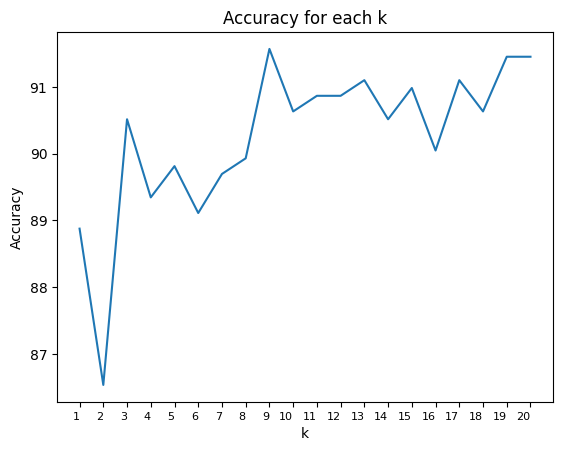

In [214]:
lists = sorted(knn_accuracies.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, [i*100 for i in y])
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy for each k")
plt.xticks(x, horizontalalignment='right', fontsize=8)
plt.show()

In [215]:
scores_model["kNN Classifier"] = knn_accuracies[max(knn_accuracies, key=knn_accuracies.get)]

### Result Display

In [216]:
scores_df = pd.DataFrame({"Model Used": list(scores_model.keys()), "Accuracy": [i*100 for i in list(scores_model.values())]})

In [217]:
scores_df.sort_values('Accuracy', inplace=True)
scores_df.reset_index(inplace=True)

Text(0.5, 1.0, 'Accuracy of Different Models')

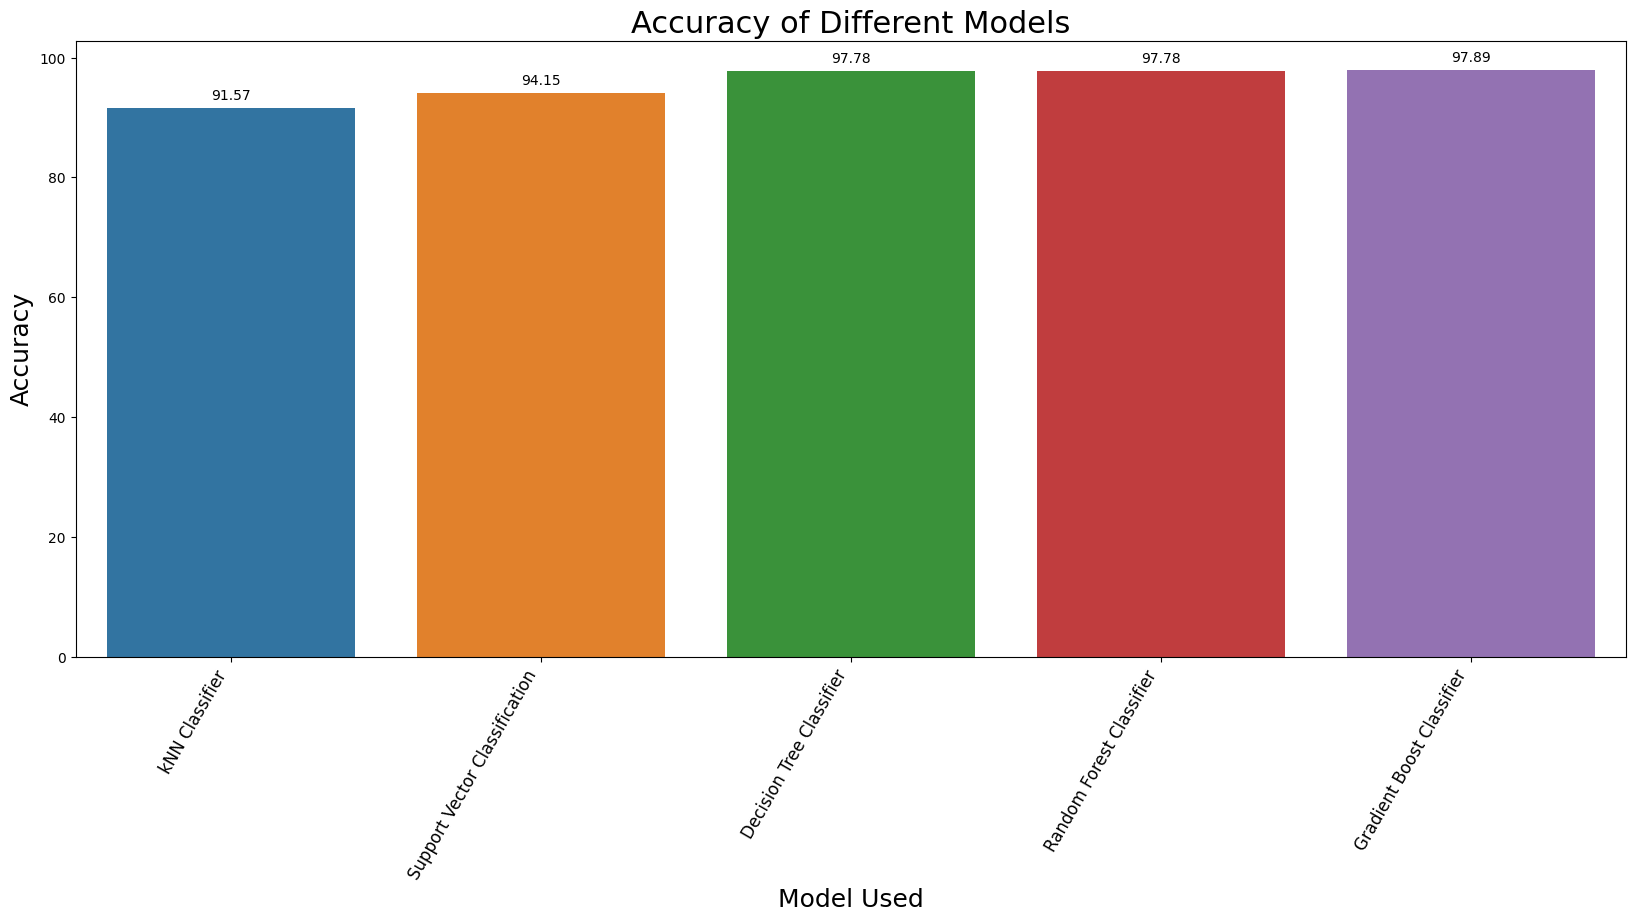

In [218]:
plt.figure(figsize=(20, 8))
splot = sns.barplot(x = "Model Used",y = "Accuracy", data = scores_df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'),(p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.xticks(scores_df.index, rotation=60, horizontalalignment='right', fontsize=12)
plt.xlabel("Model Used", size=18)
plt.ylabel("Accuracy", size=18)
plt.title("Accuracy of Different Models", fontdict={'size':22})